In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Gather and clean the data

In [10]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')

# Explore the data


# 1. Display Top 5 Rows of Dataset

In [16]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


In [60]:
data[data['Ship Mode'].str.contains('Standard Class')]


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order Day
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,1,Saturday
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,1,Saturday
4,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium,1,Saturday
5,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.100,15.342,1.800,Medium,1,Saturday
11,1/2/2011,6/2/2011,Standard Class,Dave Hallsten,Corporate,San Miguelito,Panama,Panama,LATAM,Central,...,Appliances,"Hamilton Beach Refrigerator, Silver",400.704,2,0.400,20.024,21.380,Medium,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,31-12-2014,4/1/2015,Standard Class,Julia Barnett,Home Office,Reynosa,Tamaulipas,Mexico,LATAM,North,...,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.000,0.660,1.320,Medium,12,Wednesday
51285,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,Fairfield,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium,12,Wednesday
51286,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium,12,Wednesday
51288,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium,12,Wednesday


In [70]:
data['Average Sales'] = data.groupby(['Sub-Category'])['Sales'].mean()


In [71]:
data.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order Day,Average Sales
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,1,Saturday,NaN
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,1,Saturday,NaN


In [74]:
data['total_sum'] = data.groupby(['Sub-Category'])['Sales'].sum()

In [75]:
data.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order Day,Average Sales,total_sum
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,408.300,2,0.000,106.140,35.460,Medium,1,Saturday,NaN,NaN
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,120.366,3,0.100,36.036,9.720,Medium,1,Saturday,NaN,NaN
2,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,...,66.120,4,0.000,29.640,8.170,High,1,Saturday,NaN,NaN


# 2. Check the last 5 rows of the dataset

In [12]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.200,-0.605,0.170,Medium


# 3. Find Shape of our Dataset

In [13]:
print('number of rows:',data.shape[0])
print('number of Columns:',data.shape[1])

number of rows: 51290
number of Columns: 24


# 4. Get information About Our Dataset 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

# 5. Check Null Values In the Dataset

In [17]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

# 6. Check for Duplicate Data and Drop Them

In [18]:
data.duplicated().any()

False

# 7. Get Overall Statistics About The Dataset

In [19]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


In [21]:
data.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000,51290.000,51290.000,51290.000,51290.000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.491,3.477,0.143,28.611,26.376,NaN
std,14806.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565,2.279,0.212,174.341,57.297,NaN
min,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444,1.000,0.000,-6599.978,0.000,NaN
25%,12823.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.759,2.000,0.000,0.000,2.610,NaN
50%,25645.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053,3.000,0.000,9.240,7.790,NaN
75%,38467.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053,5.000,0.200,36.810,24.450,NaN


# 8. Drop unnecessary Columns

In [22]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [24]:
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'],axis=1)

In [25]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

# Hypothesis

## Hypothesis 1. Technology products have the highest profit margin compared to other product categories.

In [26]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

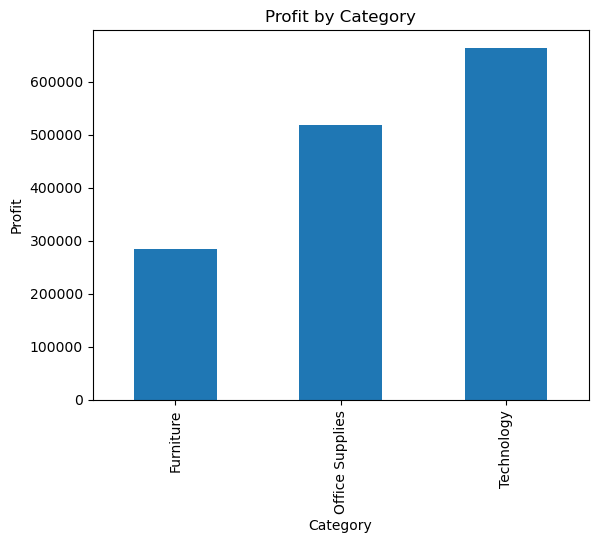

In [29]:
cat_profit = data.groupby('Category')['Profit'].sum()
cat_profit.plot(kind='bar')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show

# Conclusion : The hypothesis is supported as tech products have the highest
# profit margin of the three categories

## Hypothesis 2. The East region has the highest sales compared to other regions.

In [30]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

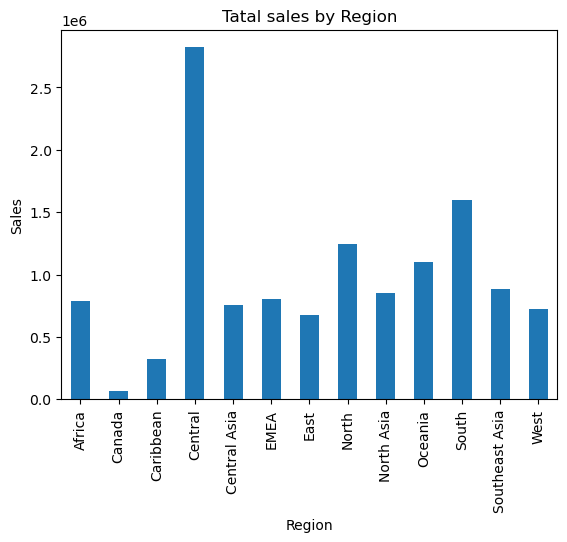

In [34]:
reg_sales = data.groupby('Region')['Sales'].sum()
reg_sales.plot(kind='bar')
plt.title('Tatal sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show

# hypothesis does not supported as the east region has the highest sales

## Hypothesis 3. Sales are higher during certain months of the year .

In [35]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [37]:
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month

<function matplotlib.pyplot.show(close=None, block=None)>

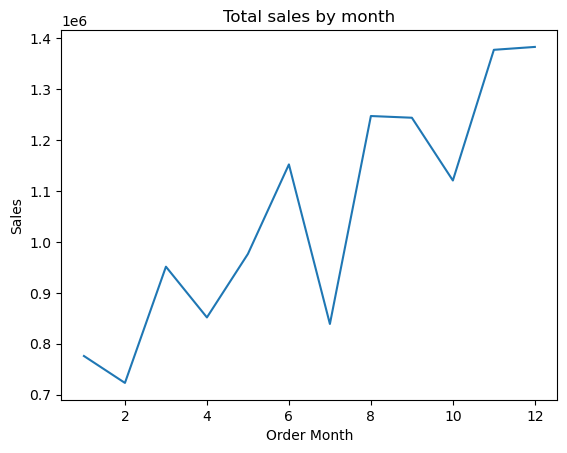

In [42]:
month_sales = data.groupby(['Order Month'])['Sales'].sum()
month_sales.plot(kind='line')
plt.title("Total sales by month")
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.show

# conclusion : our hypothesis is supported as sales are higher 
# during certain months of year

## Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products. 

In [43]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

## Hypothesis 5: The company's profit is more on weekdays than on weekends 

In [51]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

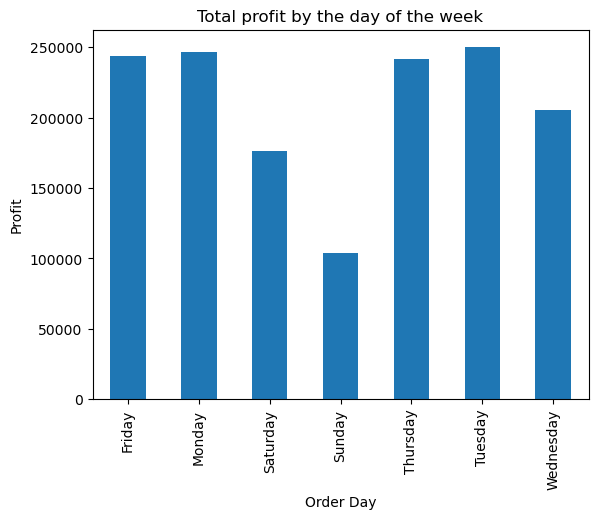

In [56]:
data['Order Day'] = pd.DatetimeIndex(data['Order Date']).day_name()

day_profit = data.groupby(['Order Day'])['Profit'].sum()
day_profit.plot(kind='bar')
plt.title('Total profit by the day of the week')
plt.xlabel('Order Day')
plt.ylabel('Profit')
plt.show

# conclusion : The hypothesis is supported as companys profit 
# is higher on weekdays compared to weekends